<h1> 1. Encoding Data using Color and Size

<h3> 1.1 Show dataset and describe data attributes

In [2]:
import pandas as pd

df = pd.read_json('https://raw.githubusercontent.com/vega/vega-datasets/next/data/movies.json')
# Remove redundant columns and drop any row having missing data
df = df.iloc[:, [0, 1, 2, 4, 5, 8, 10, 14, 15]].dropna(how='any')
# Create a year column out of release date and drop release date
df['year'] = df['Release Date'].str[-4:].astype('int')
df = df.drop(columns='Release Date').sort_values(by='year', ignore_index=True)
# Filter year
df = df[df['year'] <= 2021]

In [3]:
df.head()

,Title,US Gross,Worldwide Gross,Production Budget,Distributor,Major Genre,IMDB Rating,IMDB Votes,year
0,The Broadway Melody,2800000.0,4358000.0,379000.0,MGM,Musical,6.7,2017.0,1928
1,Mr. Smith Goes To Washington,9000000.0,9000000.0,1500000.0,Sony/Columbia,Drama,8.2,33315.0,1938
2,Rebecca,6000000.0,6000000.0,1288000.0,MGM,Drama,8.4,35429.0,1939
3,Casablanca,10462500.0,10462500.0,950000.0,Warner Bros.,Drama,8.8,167939.0,1941
4,Bathing Beauty,3500000.0,3500000.0,2361000.0,MGM,Musical,6.2,487.0,1943


* Title: Movie name
* US Gross: The revenue from the movie in the US
* Worldwide Gross: The revenue from the movie in the world
* Production Budget: Cost of making the movie
* Distributor: Distributor of the movie
* year: The year the movie was released
* Major genre: Main genre of the movie
* IMDB Rating: The Rating from IBDM
* IMDB Votes: How many votes the movie received from IMDB


<h3> 1.2 Encoding the data to graph

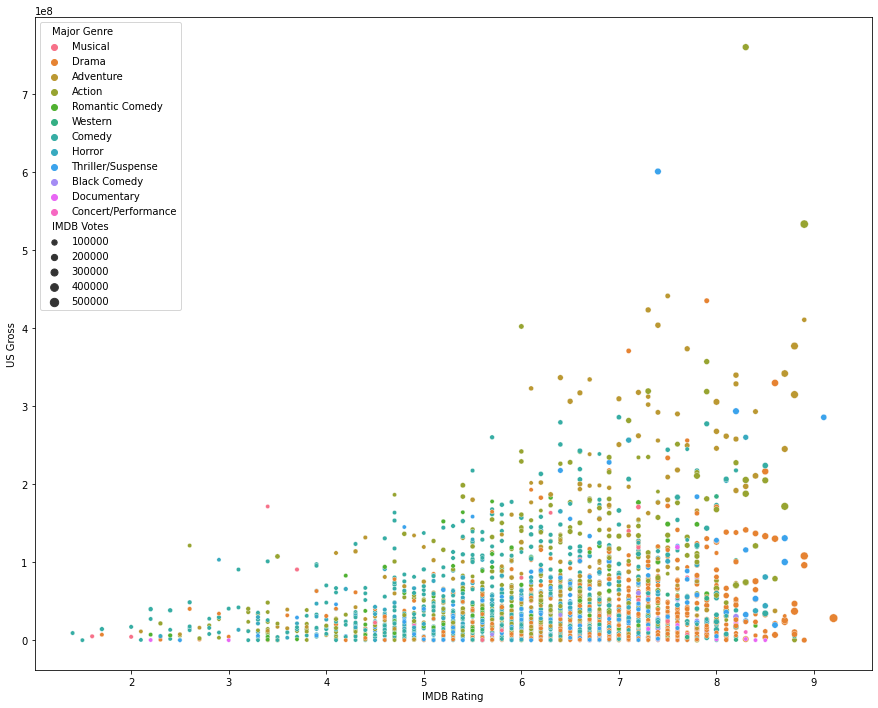

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb

# Size of the plot
plt.figure(figsize=(15,12)) 
sb.scatterplot(data=df, x='IMDB Rating', y='US Gross', hue='Major Genre', size='IMDB Votes')
plt.show()

<h3> 1.3 Optimizing the graph

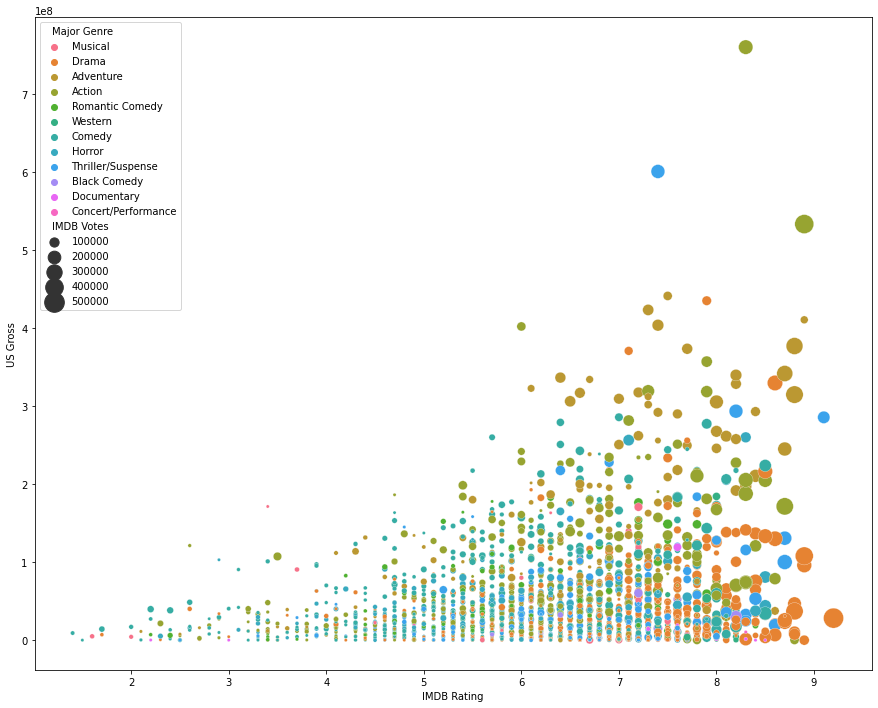

In [5]:
# Size of the plot
plt.figure(figsize=(15,12)) 
# Min size and max size in the scatter plot
minsize, maxsize = 10, 400
sb.scatterplot(data=df, x='IMDB Rating', y='US Gross', hue='Major Genre', size='IMDB Votes',sizes=(minsize, maxsize))
plt.show()


I increase the gap between the min and max values of IMBD Votes to easily show the difference among the Votes (It's hard to tell the difference from the original chart)

<h1> 2. Stacked and grouped bar charts

<h3> 2.1 Create a stacked and grouped bar chart

In [6]:
# Group the data by column 'Major Genre', and use only the three columns with average as the aggregate function
stacked_bar = df.groupby('Major Genre')['US Gross', 'Worldwide Gross', 'Production Budget'].mean()
stacked_bar.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,US Gross,Worldwide Gross,Production Budget
Major Genre,,,
Action,6.792570e+07,1.503452e+08,5.626395e+07
Adventure,1.031562e+08,2.402689e+08,7.102551e+07
Black Comedy,1.587714e+07,2.555579e+07,1.438000e+07
Comedy,4.733214e+07,7.753976e+07,2.948070e+07
Concert/Performance,1.749280e+07,2.058506e+07,6.000000e+06


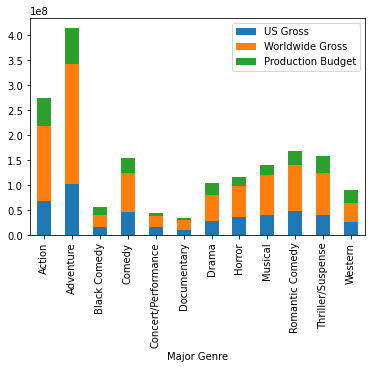

In [7]:
stacked_bar.plot(kind='bar', stacked=True)

* On average,
  - a genre makes a combined revenues 5 times to its budget
  - Worldwide Gross is as twice as US Gross
* In terms of absolute values, adventure is the genre that takes the highest investment and revenue while documentary is at the bottom
* In terms of ratio, documentary appears to make the highest gain / investment ratio, followed by concert/performance

<h1> 3. Stacked area chart

In [8]:
# Group the data by column 'Major Genre', and use only the three columns with average as the aggregate function
stacked_area = df.groupby('Distributor')['US Gross', 'Worldwide Gross', 'Production Budget'].mean()
stacked_area = stacked_area[:5]
stacked_area.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,US Gross,Worldwide Gross,Production Budget
Distributor,,,
20th Century Fox,6.687722e+07,1.399288e+08,4.198454e+07
Access Motion Picture Group,6.382270e+05,1.075504e+06,2.000000e+06
AdLab Films,1.430721e+06,3.243072e+07,1.000000e+07
Alliance,4.154732e+06,3.055473e+07,2.780000e+07
Anchor Bay Entertainment,2.235212e+06,2.235212e+06,7.750000e+06


Text(0.5, 0, 'Distributor')

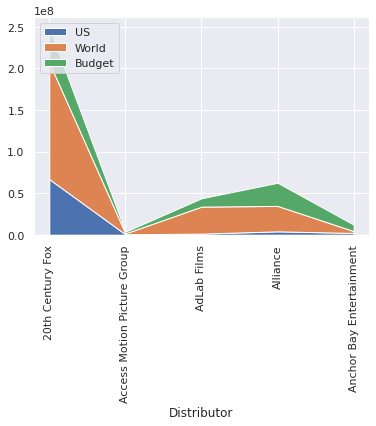

In [9]:
# set seaborn style
sb.set_theme()
# Rotate tick labels
plt.xticks(rotation = 90)
#create area chart
plt.stackplot(stacked_area.index, 
              stacked_area['US Gross'], stacked_area['Worldwide Gross'], stacked_area['Production Budget'], 
              labels=['US','World','Budget'])
plt.legend(loc='upper left')
plt.xlabel('Distributor')

* 20th Century Fox invests the most in movie industry, the bottom position belongs to Access Motion Picture Group
* 20th Century Fox has the most absolute and propotion of US Gross against other distributors
* 20th Century Fox appears to have the largest rate of return 

<h1> 4. Line Chart with Multiple Lines

<h3> 4.1

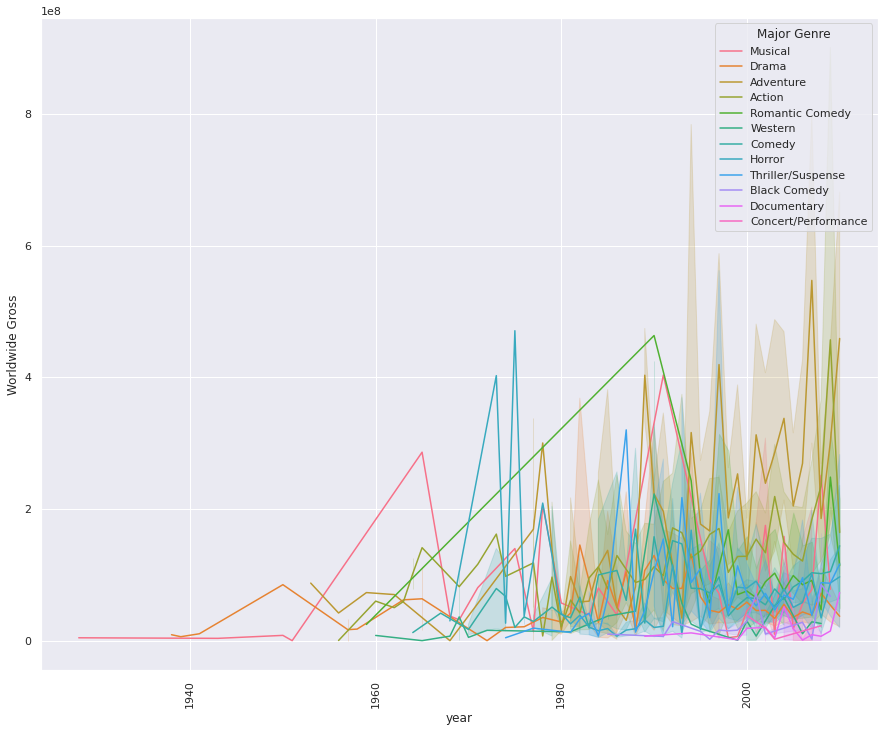

In [10]:
# Size of the plot
plt.figure(figsize=(15,12)) 
# Rotate tick labels
plt.xticks(rotation = 90)
sb.lineplot(data=df, x='year', y='Worldwide Gross', hue='Major Genre')

On average<br>
* Black comedy is the lowest, which makes sense since it applies particularly to the US situation
* Romantic comedy appeared the first time by 1960 and increased the revenue significantly until 1990 before dropping
* Thriller / Suspense had very quick change in a short amount of years
* Adventure is still a potential genre in the coming year since 1950 due to high revenue


<h3> 4.2

In [11]:
filtered_df = df.query("1e7 <= `US Gross` <= 1e8 and 1970 <= year <= 2000")
filtered_df = filtered_df[filtered_df['Major Genre'].isin(['Comedy', 'Musical', 'Drama', 'Adventure'])]
filtered_df.head()


,Title,US Gross,Worldwide Gross,Production Budget,Distributor,Major Genre,IMDB Rating,IMDB Votes,year
46,Catch-22,24911670.0,24911670.0,18000000.0,Paramount Pictures,Comedy,7.1,9671.0,1970
47,Fiddler on the Roof,80500000.0,80500000.0,9000000.0,United Artists,Musical,7.7,14260.0,1971
54,Sleeper,18344729.0,18344729.0,2000000.0,MGM,Comedy,7.3,15466.0,1973
56,Barry Lyndon,20000000.0,20000000.0,11000000.0,Warner Bros.,Drama,8.1,39909.0,1974
59,The Front Page,15000000.0,15000000.0,4000000.0,Universal,Comedy,7.2,3875.0,1974


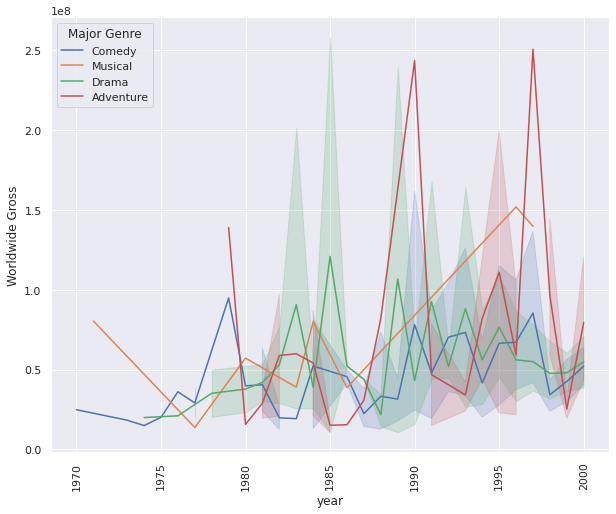

In [12]:
# Size of the plot
plt.figure(figsize=(10, 8)) 
# Rotate tick labels
plt.xticks(rotation = 90)
sb.lineplot(data=filtered_df, x='year', y='Worldwide Gross', hue='Major Genre')

On average<br>
* Comedy and drama do not witness an increase trend from 70s to 2000
* Musical increased consecutively from 1985 to 1995 before falling a little bit
* Adventure tends to make good profits after every ten years
